In [23]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np

In [24]:
path=r"C:\Users\DELL\Downloads\chromedriver_win32\chromedriver.exe"

In [25]:
from selenium.webdriver.chrome.service import Service
service = Service(executable_path=path)
options = webdriver.ChromeOptions()

In [26]:
from selenium.webdriver.common.by import By

In [27]:
driver = webdriver.Chrome(service=service, options=options)

In [28]:
driver.get('https://www.chinabidding.com/en/info/search.htm')

In [29]:
soup=BeautifulSoup(driver.page_source,"html.parser")

In [30]:
soup

<html><head lang="en">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/> <title>Chinabidding-Search Results</title>
<link href="https://www.chinabidding.com/static/css/en/main.css" rel="stylesheet" type="text/css"/>
<link href="https://www.chinabidding.com/static/css/en/common.css" rel="stylesheet" type="text/css"/>
</head>
<body style="">
<div class="wapper">
<div id="bidding">
<div class="navbar navbar-default">
<div class="container">
<div class="float-left langue">
            www.chinabidding.com/en
              
            <a href="https://www.chinabidding.com/en"><strong>English</strong></a><strong>｜</strong><a href="https://www.chinabidding.com"><strong>中文</strong></a>
</div>
<div class="float-right langue">
<ul class="list-inline" id="loginUl">
<li id="loginLi">
<a href="https://www.chinabidding.com/en/index/loginIndexEn.htm" target="_blank">Sign In or Register
                    </a>
</li>
<li class="ui-nav-item-x">
<a href="#">Help
           

In [77]:
Procurement  =[]
industry = []
company=[]
time=[]
results=[]
for i in range(1,10):
    
    #driver.get('https://www.chinabidding.com/en/info/search.htm')
    soup=BeautifulSoup(driver.page_source,"html.parser")
    
    ###Procurement#####
    for i in soup.find_all('a', class_='item-title-text bold fs18'):
        text=i.text
        regex = re.findall('(.*)',text)
        text_1=regex[1]
        regex_1= re.findall('Procurement.*',text_1)
        if regex_1:   
            Procurement.append(regex_1[0])
        else:
            Procurement.append(np.nan)
    ######Industry#######
    for i in soup.find_all('div', class_='item-link'):
        text=i.text
        regex = re.findall('Industry：(\w+.*)',text)
        if regex:
            industry.append(regex[0])
        else:
            industry.append(np.nan)
    ######company######
    for i in soup.find_all('div', class_='item-content px14'):
        text=i.text
        #print(t)
        regex=re.findall('\s+(.*)',text)
        if regex:
            company.append(regex[0])
        else:
            company.append(np.nan)
            
    #####time####
   
    for i in soup.find_all('span', class_='item-title-data gray fs12'):
        text=i.text
        regex = re.findall('\s+(.*)',text)[0]
        regex_1 = re.findall('\d+\-\d+\-\d+',regex)
        if regex_1:
            time.append(regex_1[0])
        else:
            time.append(np.nan)
        
    ######results#######
    for i in soup.find_all('span', class_='item-title-new'):
        if i:
            results.append(i.text)
        else:
            results.append(np.nan)
        
    button = driver.find_element(By.LINK_TEXT,"Next")
    button.click()
    

In [78]:
print(len(Procurement))
print(len(industry))
print(len(time))
print(len(company))
print(len(results))

90
90
90
90
90


In [79]:
df = pd.DataFrame({'Procurement':Procurement,
                  'Industry':industry,
                  'Company':company,
                  'Time':time,
                  'Results':results})

In [80]:
df

,Procurement,Industry,Company,Time,Results
0,Procurement of 0704-2340JDCP1895 Dongfang 13-2...,Machining,"CNCCC International Tendering Co.,Ltd. entrust...",2023-08-23,New Tenders
1,Procurement of 4197-2240XAESW002/18 Silicon In...,Others,Project Name:Silicon Industrial Base Phase II ...,2023-08-23,Tender Awards
2,Procurement of 0613-234024103936 Ultra high de...,Medical equipment & medicine,Shanghai Machinery & Electric Equipment Tender...,2023-08-23,New Tenders
3,Procurement of 0811-234DSITC1756 X-ray residua...,Apparatus and Meter,"Shanghai Dongsong Healthcare & Technology Co.,...",2023-08-23,New Tenders
4,Procurement of 2051-234111010419 ShanghaiTech ...,Apparatus and Meter,Project Name:ShanghaiTech University has a bui...,2023-08-23,Tender Awards
...,...,...,...,...,...
85,Procurement of 0712-234022303051 Three-way swi...,Machining,Project Name:Three-way switch ball valve for S...,2023-08-22,Evaluation Results
86,Procurement of 0626-234230210014 Procurement o...,Apparatus and Meter,Project Name:Procurement of gear measuring ins...,2023-08-22,Tender Awards
87,Procurement of 0753-234023253002/01 raman spec...,Apparatus and Meter,CHINA STATE SHIPBUILDING EQUIPMENT AND MATERIA...,2023-08-22,New Tenders
88,Procurement of 0705-234005009003 Bid for Clini...,Apparatus and Meter,"Shanghai International Tendering Co., Ltd. ent...",2023-08-22,New Tenders


In [81]:
df.to_csv('chinabidding.csv')

# Data Preparation

In [82]:
df.info() # Chechking info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Procurement  90 non-null     object
 1   Industry     90 non-null     object
 2   Company      90 non-null     object
 3   Time         90 non-null     object
 4   Results      90 non-null     object
dtypes: object(5)
memory usage: 3.6+ KB


In [83]:
df.isna().sum() # there is one null value in Industry

Procurement    0
Industry       0
Company        0
Time           0
Results        0
dtype: int64

In [84]:
df['Industry'].value_counts()

Apparatus and Meter              37
Medical equipment & medicine     20
Machining                        16
Others                           10
Electronic & communications       4
Transport, storage service        1
Petroleum, chemicals              1
Apparatus and Meter;其他设备;电子通信     1
Name: Industry, dtype: int64

In [85]:
# Filling null value with others as there is one null value
df['Industry'].fillna('Others',inplace=True)

In [86]:
df.isna().sum()

Procurement    0
Industry       0
Company        0
Time           0
Results        0
dtype: int64

In [87]:
# Converting the type of the column
df['Time']=df['Time'].astype('datetime64')

In [91]:
# Cleaning the data
# Removing all unecessary text data

df['Industry']=df['Industry'].str.replace(r"[^A-Za-z0-9;&\s,]", "")

C:\Users\DELL\AppData\Local\Temp\ipykernel_16008\1502191814.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Industry']=df['Industry'].str.replace(r"[^A-Za-z0-9;&\s,]", "")


In [92]:
df['Industry'].value_counts()

Apparatus and Meter             37
Medical equipment & medicine    20
Machining                       16
Others                          10
Electronic & communications      4
Transport, storage service       1
Petroleum, chemicals             1
Apparatus and Meter;;            1
Name: Industry, dtype: int64

In [98]:
df.drop(['Industry_1'],axis=1,inplace=True)

In [99]:
df

,Procurement,Industry,Company,Time,Results
0,Procurement of 0704-2340JDCP1895 Dongfang 13-2...,Machining,"CNCCC International Tendering Co.,Ltd. entrust...",2023-08-23,New Tenders
1,Procurement of 4197-2240XAESW002/18 Silicon In...,Others,Project Name:Silicon Industrial Base Phase II ...,2023-08-23,Tender Awards
2,Procurement of 0613-234024103936 Ultra high de...,Medical equipment & medicine,Shanghai Machinery & Electric Equipment Tender...,2023-08-23,New Tenders
3,Procurement of 0811-234DSITC1756 X-ray residua...,Apparatus and Meter,"Shanghai Dongsong Healthcare & Technology Co.,...",2023-08-23,New Tenders
4,Procurement of 2051-234111010419 ShanghaiTech ...,Apparatus and Meter,Project Name:ShanghaiTech University has a bui...,2023-08-23,Tender Awards
...,...,...,...,...,...
85,Procurement of 0712-234022303051 Three-way swi...,Machining,Project Name:Three-way switch ball valve for S...,2023-08-22,Evaluation Results
86,Procurement of 0626-234230210014 Procurement o...,Apparatus and Meter,Project Name:Procurement of gear measuring ins...,2023-08-22,Tender Awards
87,Procurement of 0753-234023253002/01 raman spec...,Apparatus and Meter,CHINA STATE SHIPBUILDING EQUIPMENT AND MATERIA...,2023-08-22,New Tenders
88,Procurement of 0705-234005009003 Bid for Clini...,Apparatus and Meter,"Shanghai International Tendering Co., Ltd. ent...",2023-08-22,New Tenders


In [108]:
df['Procurement']

0     Procurement of 0704-2340JDCP1895 Dongfang 13-2...
1     Procurement of 4197-2240XAESW002/18 Silicon In...
2     Procurement of 0613-234024103936 Ultra high de...
3     Procurement of 0811-234DSITC1756 X-ray residua...
4     Procurement of 2051-234111010419 ShanghaiTech ...
                            ...                        
85    Procurement of 0712-234022303051 Three-way swi...
86    Procurement of 0626-234230210014 Procurement o...
87    Procurement of 0753-234023253002/01 raman spec...
88    Procurement of 0705-234005009003 Bid for Clini...
89    Procurement of 0687-234020230039 Tianfu Jinche...
Name: Procurement, Length: 90, dtype: object

In [109]:
regex = r'Procurement\sof\s(\d+\-\d+\w+\s?\/?\d+)'

df['Biding_no'] = df['Procurement'].apply(lambda x: re.findall(regex, x))

In [111]:
df['Biding_no'][0]

['0704-2340JDCP1895']

In [113]:
regex = r'Procurement\sof\s\d+\-\d+\w+\s?\/?\d+(.*)'


df['Biding_content'] = df['Procurement'].apply(lambda x: re.findall(regex, x))

In [132]:
df['Biding_content'][3]

' X-ray residual stress analyzer(1)'

In [131]:
df['Biding_content']=df.Biding_content.apply(lambda x: ', '.join([str(i) for i in x]))

In [133]:
df['Biding_no'] = df.Biding_no.apply(lambda x: ', '.join([str(i) for i in x]))

In [134]:
df['Biding_no']

0        0704-2340JDCP1895
1     4197-2240XAESW002/18
2        0613-234024103936
3        0811-234DSITC1756
4        2051-234111010419
              ...         
85       0712-234022303051
86       0626-234230210014
87    0753-234023253002/01
88       0705-234005009003
89       0687-234020230039
Name: Biding_no, Length: 90, dtype: object

In [135]:
df

,Procurement,Industry,Company,Time,Results,Biding_no,Biding_content
0,Procurement of 0704-2340JDCP1895 Dongfang 13-2...,Machining,"CNCCC International Tendering Co.,Ltd. entrust...",2023-08-23,New Tenders,0704-2340JDCP1895,Dongfang 13-2 CEPB compressor module project(1)
1,Procurement of 4197-2240XAESW002/18 Silicon In...,Others,Project Name:Silicon Industrial Base Phase II ...,2023-08-23,Tender Awards,4197-2240XAESW002/18,Silicon Industrial Base Phase II Project of X...
2,Procurement of 0613-234024103936 Ultra high de...,Medical equipment & medicine,Shanghai Machinery & Electric Equipment Tender...,2023-08-23,New Tenders,0613-234024103936,Ultra high definition open surgery fluorescen...
3,Procurement of 0811-234DSITC1756 X-ray residua...,Apparatus and Meter,"Shanghai Dongsong Healthcare & Technology Co.,...",2023-08-23,New Tenders,0811-234DSITC1756,X-ray residual stress analyzer(1)
4,Procurement of 2051-234111010419 ShanghaiTech ...,Apparatus and Meter,Project Name:ShanghaiTech University has a bui...,2023-08-23,Tender Awards,2051-234111010419,ShanghaiTech University has a built-in high-p...
...,...,...,...,...,...,...,...
85,Procurement of 0712-234022303051 Three-way swi...,Machining,Project Name:Three-way switch ball valve for S...,2023-08-22,Evaluation Results,0712-234022303051,Three-way switch ball valve for Sinopec Zhenh...
86,Procurement of 0626-234230210014 Procurement o...,Apparatus and Meter,Project Name:Procurement of gear measuring ins...,2023-08-22,Tender Awards,0626-234230210014,Procurement of gear measuring instrument(2)
87,Procurement of 0753-234023253002/01 raman spec...,Apparatus and Meter,CHINA STATE SHIPBUILDING EQUIPMENT AND MATERIA...,2023-08-22,New Tenders,0753-234023253002/01,raman spectrometer(1)
88,Procurement of 0705-234005009003 Bid for Clini...,Apparatus and Meter,"Shanghai International Tendering Co., Ltd. ent...",2023-08-22,New Tenders,0705-234005009003,Bid for Clinical Mass Spectrometry Procuremen...


# Data Analysis

<Axes: >

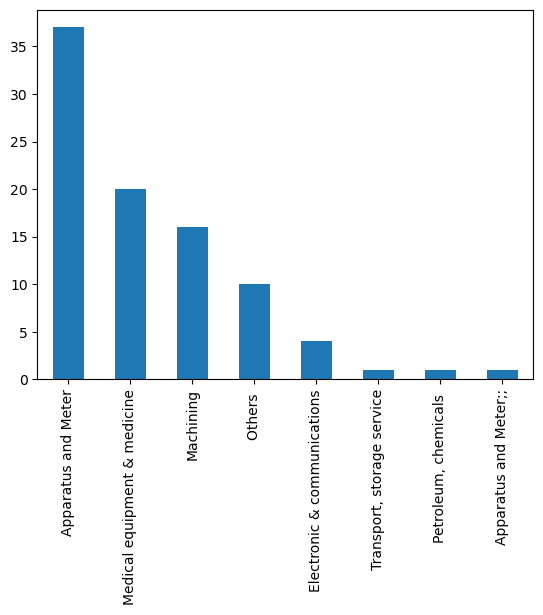

In [102]:
df['Industry'].value_counts().plot(kind='bar')

#### Here we can see that number of counts of Industry types are Apparatus and meter followed by Medical equipment & Medicine

<Axes: >

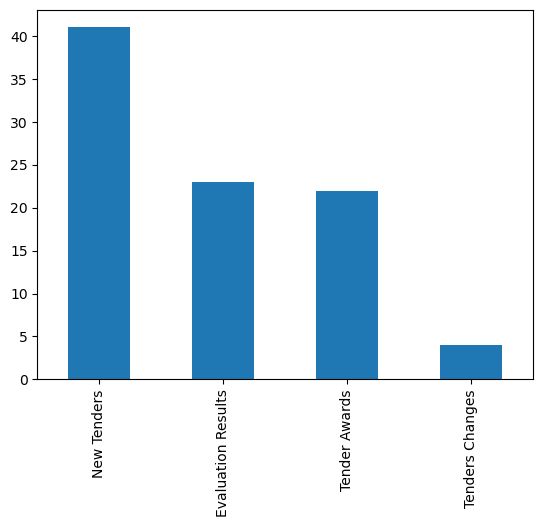

In [103]:
df['Results'].value_counts().plot(kind='bar')

In [137]:
df['Biding_content']

0       Dongfang 13-2 CEPB compressor module project(1)
1      Silicon Industrial Base Phase II Project of X...
2      Ultra high definition open surgery fluorescen...
3                     X-ray residual stress analyzer(1)
4      ShanghaiTech University has a built-in high-p...
                            ...                        
85     Three-way switch ball valve for Sinopec Zhenh...
86          Procurement of gear measuring instrument(2)
87                                raman spectrometer(1)
88     Bid for Clinical Mass Spectrometry Procuremen...
89     Tianfu Jincheng Laboratory (Frontier Medical ...
Name: Biding_content, Length: 90, dtype: object

<Axes: >

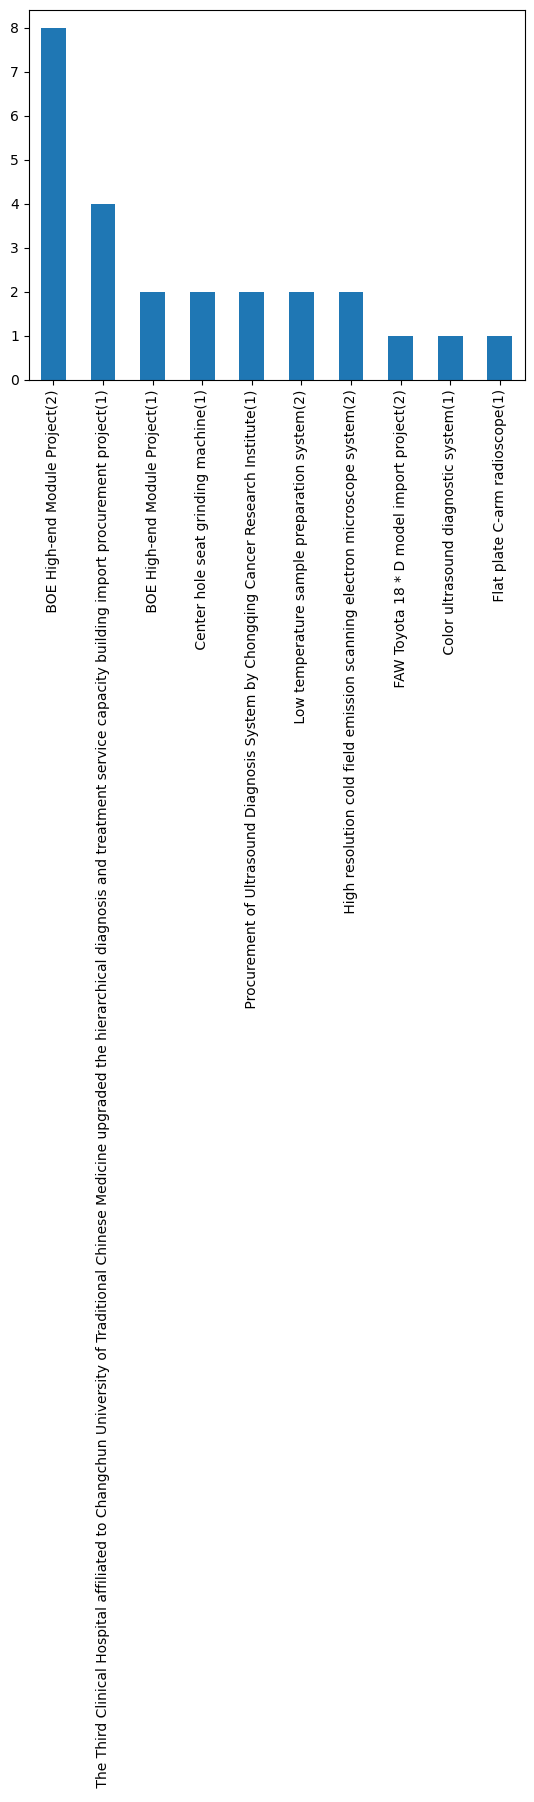

In [139]:
# Top 10 Biding Content
df['Biding_content'].value_counts().head(10).plot(kind='bar')